In [196]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [197]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [198]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [199]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
# Here order of 

In [200]:
df['smoker'] = oe.fit_transform(df[['smoker']])

In [201]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1.0,southwest,16884.92400
1,18,male,33.770,1,0.0,southeast,1725.55230
2,28,male,33.000,3,0.0,southeast,4449.46200
3,33,male,22.705,0,0.0,northwest,21984.47061
4,32,male,28.880,0,0.0,northwest,3866.85520


In [202]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',dtype=np.int32)
X_new = ohe.fit_transform(df[['sex','region']]).toarray()

In [203]:
newMat = pd.DataFrame(X_new,columns=ohe.get_feature_names_out(['sex', 'region']))

In [204]:
df.drop(columns=['sex','region'], inplace= True)

In [205]:
df = pd.concat([newMat, df], axis=1)

In [206]:
df.head()

,sex_male,region_northwest,region_southeast,region_southwest,age,bmi,children,smoker,charges
0,0,0,0,1,19,27.900,0,1.0,16884.92400
1,1,0,1,0,18,33.770,1,0.0,1725.55230
2,1,0,1,0,28,33.000,3,0.0,4449.46200
3,1,1,0,0,33,22.705,0,0.0,21984.47061
4,1,1,0,0,32,28.880,0,0.0,3866.85520


In [207]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x

,sex_male,region_northwest,region_southeast,region_southwest,age,bmi,children,smoker
0,0,0,0,1,19,27.900,0,1.0
1,1,0,1,0,18,33.770,1,0.0
2,1,0,1,0,28,33.000,3,0.0
3,1,1,0,0,33,22.705,0,0.0
4,1,1,0,0,32,28.880,0,0.0
...,...,...,...,...,...,...,...,...
1333,1,1,0,0,50,30.970,3,0.0
1334,0,0,0,0,18,31.920,0,0.0
1335,0,0,1,0,18,36.850,0,0.0
1336,0,0,0,1,21,25.800,0,0.0


In [208]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle= True, random_state= 42)

In [209]:
# Now feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [210]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [211]:
print(x_train)
print(x_test)

[[-1.0246016   1.78316783 -0.59966106 ... -1.75652513  0.73433626
  -0.50874702]
 [-1.0246016  -0.56079971 -0.59966106 ... -1.03308239 -0.91119211
  -0.50874702]
 [-1.0246016  -0.56079971  1.66760869 ... -0.94368672 -0.91119211
  -0.50874702]
 ...
 [ 0.97598911 -0.56079971 -0.59966106 ... -0.89153925 -0.91119211
  -0.50874702]
 [-1.0246016  -0.56079971 -0.59966106 ...  2.82086429  0.73433626
   1.96561348]
 [ 0.97598911 -0.56079971 -0.59966106 ... -0.10932713 -0.91119211
  -0.50874702]]
[[-0.95618289 -0.58884095 -0.65814518 ... -0.93715188  0.82250933
  -0.50233101]
 [-0.95618289  1.69825145 -0.65814518 ... -0.16752679 -0.89961958
  -0.50233101]
 [-0.95618289  1.69825145 -0.65814518 ... -0.66551949 -0.89961958
   1.99071921]
 ...
 [ 1.04582503 -0.58884095 -0.65814518 ... -0.48443124 -0.03855512
  -0.50233101]
 [-0.95618289 -0.58884095  1.51942159 ...  2.59486336 -0.89961958
   1.99071921]
 [-0.95618289 -0.58884095 -0.65814518 ...  0.49646348 -0.03855512
  -0.50233101]]


In [212]:
## Now first linear reg
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [213]:
lr.fit(x_train, y_train)

LinearRegression()

In [214]:
y_lin_pred = lr.predict(x_test)

In [215]:
print(x_test.shape)
print(y_test.shape)

(268, 8)
(268,)


In [216]:
from sklearn.metrics import r2_score
print("For linear regression, r2 score is: ", r2_score(y_test, y_lin_pred))

For linear regression, r2 score is:  0.7833974353361579


In [217]:
## Now for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [218]:
poly = PolynomialFeatures(degree=2)

In [219]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [220]:
x_test_poly

array([[ 1.00000000e+00, -9.56182887e-01, -5.88840953e-01, ...,
         6.76521596e-01, -4.13171946e-01,  2.52336449e-01],
       [ 1.00000000e+00, -9.56182887e-01,  1.69825145e+00, ...,
         8.09315385e-01,  4.51906816e-01,  2.52336449e-01],
       [ 1.00000000e+00, -9.56182887e-01,  1.69825145e+00, ...,
         8.09315385e-01, -1.79088997e+00,  3.96296296e+00],
       ...,
       [ 1.00000000e+00,  1.04582503e+00, -5.88840953e-01, ...,
         1.48649765e-03,  1.93674350e-02,  2.52336449e-01],
       [ 1.00000000e+00, -9.56182887e-01, -5.88840953e-01, ...,
         8.09315385e-01, -1.79088997e+00,  3.96296296e+00],
       [ 1.00000000e+00, -9.56182887e-01, -5.88840953e-01, ...,
         1.48649765e-03,  1.93674350e-02,  2.52336449e-01]])

In [221]:
polyLR = LinearRegression()

In [222]:
polyLR.fit(x_train_poly, y_train)

LinearRegression()

In [223]:
y_pred_poly = polyLR.predict(x_test_poly)

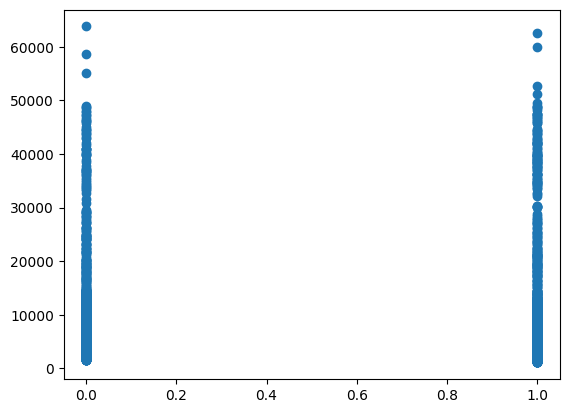

In [228]:
plt.scatter(x.iloc[:,0],y)

In [224]:
print("For Polynomial regression, r2 score is: ", r2_score(y_test, y_pred_poly))

For Polynomial regression, r2 score is:  -1.5850319305855124e+25
